# Machine Learning

This tutorial uses **scikit-learn**, an open source machine learning (ML) framework based on numpy, scipy and matplotlib.

In [1]:
# For visualization
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

## Task: Recognition of handwritten numbers

A widely used example for the use of machine learning is the recognition of handwritten numbers, for which we will build, train and assess the accuracy of a machine learning model. The example is so common in fact that sklearn, like many other ML frameworks, come with a built-in dataset of handwritten numbers.

The dataset is composed of 1797 labeled images


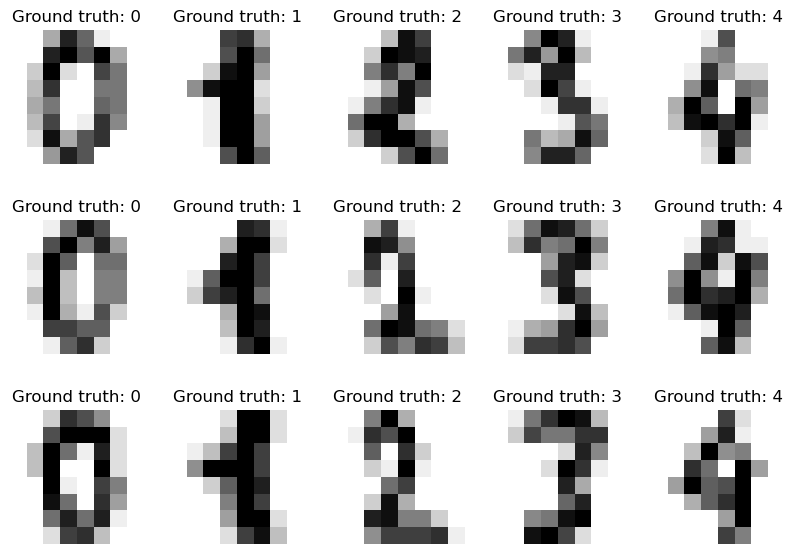

In [38]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 7))
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        ax.set_axis_off()
        ax.imshow(digits.images[i * 10 + j], cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title("Ground truth: %i" % digits.target[i * 10 + j])

print(f"The dataset is composed of {len(digits.target)} labeled images")

## Splitting the dataset

For ML applications the data is always split in at least two datasets, since for proper evaluation of the performance of the trained model unseen data is required. Whether additional separation of the dataset is required depends on the ML model applied, as well as the optimization algorithm.

In [67]:
# Flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 80% train and 20% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=True
)

## Pick the model

In order to make an educated choice for the model to be applied, it helps to understand the structure of the data at hand. This is, however, a rather vague statement, which should encourage you to play around with models sometimes. The most common choices are neural networks (NNs) and support vector machines (SVMs) with other notable mentions like random forest models. With a rather modest amount of data at hand to solve a classification type problem, it makes sense to use an SVM.

In [68]:
# Create SVM classifier with a radial basis function (RBF) kernel
clf = svm.SVC(gamma=0.001)

## Train the model

In [69]:
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Remember to save your model to a file, if you want to use it again!!!

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Assess the accuracy

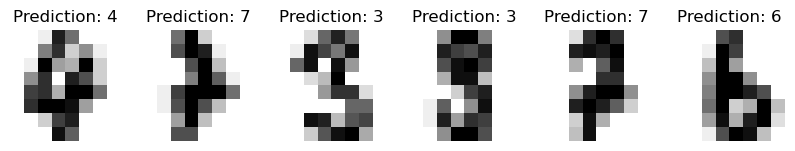

In [70]:
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

# Plot some predictions
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [71]:
# Show how the classifier performs for the individual numbers
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       0.96      1.00      0.98        68
           2       1.00      1.00      1.00        65
           3       0.98      1.00      0.99        64
           4       1.00      1.00      1.00        70
           5       1.00      0.97      0.99        68
           6       0.99      0.99      0.99        85
           7       0.99      1.00      0.99        72
           8       0.99      0.97      0.98        76
           9       0.99      0.96      0.97        80

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719




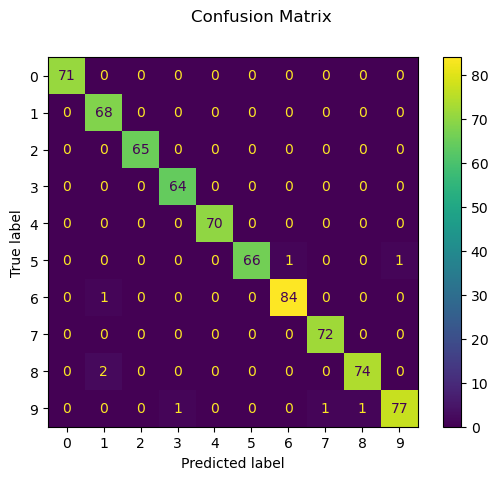

In [72]:
# Show confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
# uncomment to show it as 2D array
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

As can be seen the overall accuracy is very good, with the confusion matrix showing which numbers have been confused with each other how often.
It is also interesting to see how the model performance improved over the training iterations, so-called epochs.

Text(0.5, 1.0, 'Learning Curve for SVC')

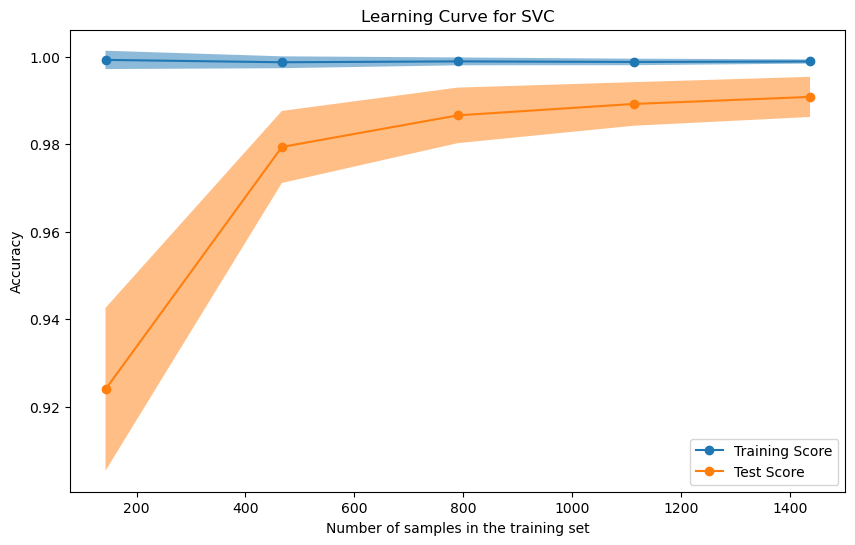

In [58]:
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

# start from untrained model again
svc = svm.SVC(kernel="rbf", gamma=0.001)

common_params = {
    "X": np.concatenate((X_train, X_test), axis=0),
    "y": np.concatenate((y_train, y_test), axis=0),
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharey=True)
LearningCurveDisplay.from_estimator(svc, **common_params, ax=ax)
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ["Training Score", "Test Score"])
ax.set_title(f"Learning Curve for {svc.__class__.__name__}")

## Comparison between models

Now one can start comparing the performance between different models, as e.g. done here with a naive Bayes classifier:

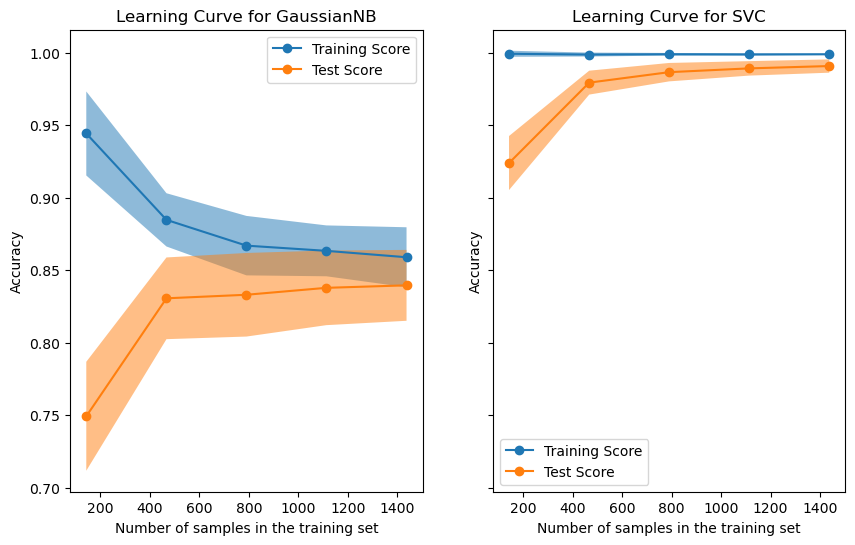

In [59]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

for ax_idx, estimator in enumerate([naive_bayes, svc]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

## YouTube material

If you choose a project in the category of machine learning, it is highly recommended (close to mandatory) that you also take the time to watch the series of four videos on neural networks from the (generally) excellent channel [3Blue1Brown](https://www.youtube.com/@3blue1brown). In the case of images, it is rather obvious how to represent the input data in the input layer namely by associating neurons to the bits in the images. In other cases, it may be less obvious. How do we e.g. represent molecules and how can we get an objective measure of closeness of chemical structures? In answer to these questions, [molecular fingerprints](https://www.youtube.com/watch?v=kBk8HbjWwCw) have been developed.

## Machine Learning-Guided Protein Engineering

Find inspiration for using machine learning in protein engineering in [this perspective article](https://doi.org/10.1021/acscatal.3c02743). The authors provide an overview of ongoing trends in this domain, highlight recent case studies, and examine the current limitations of machine learning-based methods. They present their opinions on the fundamental problems and outline the potential directions for future research.

## Forming your project

You are encouraged to develop your own model. Below is an example from CB1020 HT24 which may serve as inspiration.

**Identification of risk factors for cardiovascular disease using data analysis and machine learning (Project from CB1020 HT24)**

Cardiovascular disease (CVD) is the leading cause of death in Sweden, with over 2 million affected and approximately 30,000 annual deaths. The aim of the project was to use data analysis combined with the machine learning algorithms GradientBoosting, RandomForest and SHAP in Python to investigate which five factors contribute most to CVD, and to use machine learning to predict whether a person has CVD or not. The project analyzed a csv file with patient data from 70,000 people in twelve different categories: age, height, weight, gender, systolic blood pressure, diastolic blood pressure, cholesterol level, glucose level, smoking, alcohol intake, physical activity and presence or absence of cardiovascular disease. The five most important risk factors for CVD were identified as systolic and diastolic blood pressure, BMI, age, and cholesterol. The results showed that older people and individuals with higher BMI had an increased risk of CVD, which is consistent with previous research. The machine learning algorithms GradientBoosting and RandomForest demonstrated a test accuracy of 73.6%, with a better ability to identify CVD cases than non-CVD cases. Data analysis also indicated that there were shortcomings in the representation of different age groups and gender, which may have influenced the results.